Libraries

In [2]:
from pydataset import data
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Read in Data

In [3]:
crime = data('USArrests')

print(crime.head())

            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


Part A: Custering states with complete linkage and euclidean distance. Not scaled.

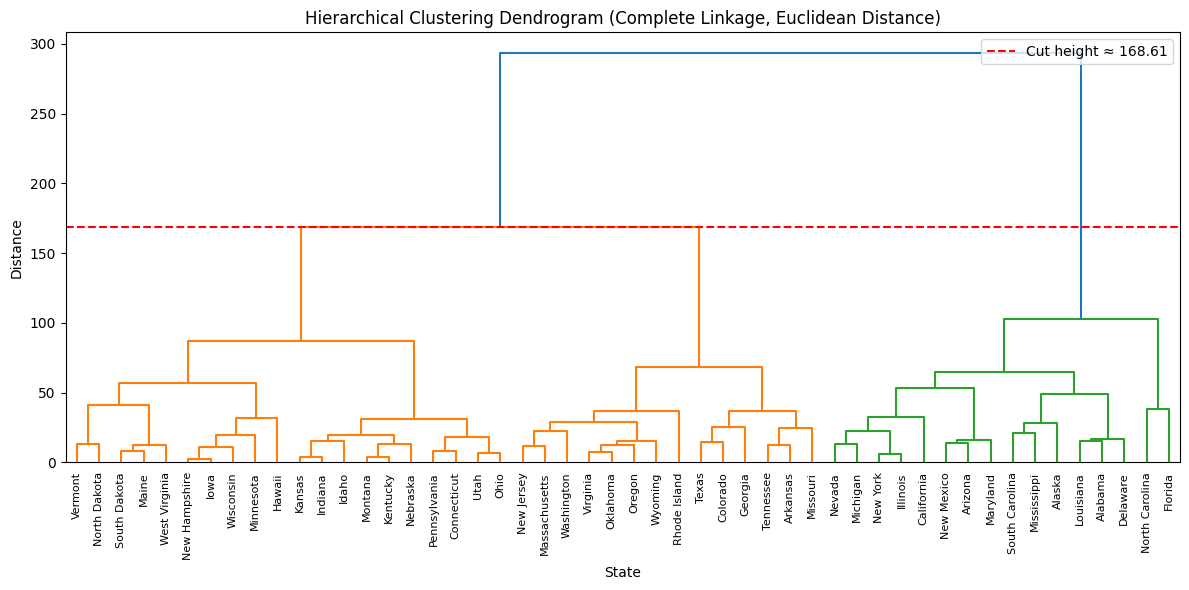

In [4]:

crime.index.name = 'State'
crime.reset_index(inplace=True)

X = crime.drop('State', axis=1)

linked = linkage(X, method='complete', metric='euclidean')

crime['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

cut_height = linked[X.shape[0] - 3, 2]

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=crime['State'].values, orientation='top',
           distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage, Euclidean Distance)')
plt.xlabel('State')
plt.ylabel('Distance')

plt.axhline(y=cut_height, c='red', linestyle='--', label=f'Cut height ≈ {cut_height:.2f}')
plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Part B: States fall into 3 clusters when dendrogram is split at distance 168.61

In [5]:
for cluster_label, group in crime.groupby('Cluster'):
    print(f"\nCluster {cluster_label}:")
    print(group['State'].values)

n = X.shape[0]  
cut_index = n - 3  
cut_height = linked[cut_index, 2]
print()
print(f"Cut height to get 3 clusters: {cut_height:.4f}")



Cluster 1:
['Alabama' 'Alaska' 'Arizona' 'California' 'Delaware' 'Florida' 'Illinois'
 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Nevada' 'New Mexico'
 'New York' 'North Carolina' 'South Carolina']

Cluster 2:
['Arkansas' 'Colorado' 'Georgia' 'Massachusetts' 'Missouri' 'New Jersey'
 'Oklahoma' 'Oregon' 'Rhode Island' 'Tennessee' 'Texas' 'Virginia'
 'Washington' 'Wyoming']

Cluster 3:
['Connecticut' 'Hawaii' 'Idaho' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Maine' 'Minnesota' 'Montana' 'Nebraska' 'New Hampshire' 'North Dakota'
 'Ohio' 'Pennsylvania' 'South Dakota' 'Utah' 'Vermont' 'West Virginia'
 'Wisconsin']

Cut height to get 3 clusters: 168.6114


Part C: Clustering States with complete linkage and euclidean distance with scaled variables to have mean of 0 and standard deviation of 1. This is achieved by standardscaler()

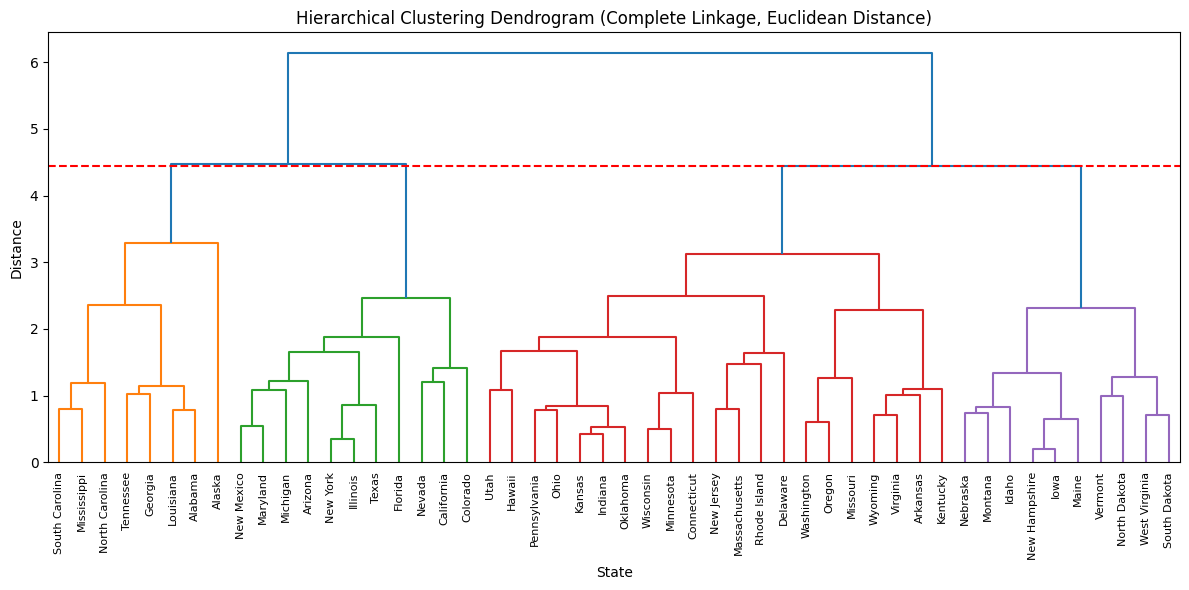

In [6]:
#This is so that we start with fresh data again
crime = data('USArrests')

crime.index.name = 'State'
crime.reset_index(inplace=True)

X = crime.drop('State', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='complete', metric='euclidean')

# Cut the dendrogram to 3 clusters
crime['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=crime['State'].values, orientation='top',
           distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage, Euclidean Distance)')
plt.xlabel('State')
plt.ylabel('Distance')

max_d = 0  
plt.axhline(y=linked[-3, 2], c='red', linestyle='--')  

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




Part C cont.: 3 Clusters of states when dendrogram is cut at distance of 4.46

In [7]:
for cluster_label, group in crime.groupby('Cluster'):
    print(f"\nCluster {cluster_label}:")
    print(group['State'].values)


n = X_scaled.shape[0]
cut_index = n - 3  
cut_height = linked[cut_index, 2]
print()
print(f"Cut height to get 3 clusters: {cut_height:.4f}")




Cluster 1:
['Arkansas' 'Connecticut' 'Delaware' 'Hawaii' 'Idaho' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Maine' 'Massachusetts' 'Minnesota' 'Missouri'
 'Montana' 'Nebraska' 'New Hampshire' 'New Jersey' 'North Dakota' 'Ohio'
 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Dakota' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

Cluster 2:
['Arizona' 'California' 'Colorado' 'Florida' 'Illinois' 'Maryland'
 'Michigan' 'Nevada' 'New Mexico' 'New York' 'Texas']

Cluster 3:
['Alabama' 'Alaska' 'Georgia' 'Louisiana' 'Mississippi' 'North Carolina'
 'South Carolina' 'Tennessee']

Cut height to get 3 clusters: 4.4649


Part D: Even though part A and Part C or un-scaled and scaled data were split to produce 3 clusters, the effects of scaling improve the model's ability. Notice in the dendrogram for part A un-scaled data our model essentially creates two main clusters "orange and green". This is likely due to some variables with larger ranges dominating the distance calculation. However, after scaling data the model is able to become more granular "finds 4 distinct branches" and all variables will contribute equally to the distance calculation due to standardization.  